In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [30]:
Base_polpop_iell_csrf=pd.read_csv('C:\MS\EDA\Base_polpop_iell_csrf_17oct.csv')

In [ ]:
for i in Base_polpop_iell_csrf.columns:
    print(i)

In [31]:
YearClusterDataNSo2=Base_polpop_iell_csrf[['rec_id','SPM_P10','SPM_Median','SPM_P90','Median_SPM_MOM_diff','P10_SPM_MOM_diff','P90_SPM_MOM_diff']]

In [ ]:
#YearClusterDataNSo2=Base_polpop_iell_csrf[['rec_id','SPM_P10','SPM_Median','SPM_P90','Median_SPM_MOM_diff','P10_SPM_MOM_diff','P90_SPM_MOM_diff','SPM_Median_YOY_diff','SPM_P10_YOY_diff','SPM_P90_YOY_diff']]

In [32]:
YearClusterDataNSo2.isnull().any(axis=0) 

rec_id                 False
SPM_P10                 True
SPM_Median              True
SPM_P90                 True
Median_SPM_MOM_diff     True
P10_SPM_MOM_diff        True
P90_SPM_MOM_diff        True
dtype: bool

In [33]:
YearClusterDataNSo2.isnull().sum()

rec_id                    0
SPM_P10                2725
SPM_Median             2725
SPM_P90                2725
Median_SPM_MOM_diff    2853
P10_SPM_MOM_diff       2853
P90_SPM_MOM_diff       2853
dtype: int64

In [34]:
YearClusterDataNSo2.dropna(inplace=True)

In [35]:
YearClusterDataNSo2.isnull().sum()

rec_id                 0
SPM_P10                0
SPM_Median             0
SPM_P90                0
Median_SPM_MOM_diff    0
P10_SPM_MOM_diff       0
P90_SPM_MOM_diff       0
dtype: int64

In [36]:
YearClusterDataNSo2_ori=YearClusterDataNSo2

In [39]:
YearClusterDataNSo2_ori.head()

,rec_id,SPM_P10,SPM_Median,SPM_P90,Median_SPM_MOM_diff,P10_SPM_MOM_diff,P90_SPM_MOM_diff
310,310,48.7,83.5,118.3,-119.5,-67.1,-159.1
311,311,51.4,113.0,204.2,29.5,2.7,85.9
312,312,119.4,246.5,300.0,133.5,68.0,95.8
313,313,106.1,203.0,259.9,-43.5,-13.3,-40.1
314,314,72.5,133.5,212.0,-69.5,-33.6,-47.9


In [37]:
YearClusterDataNSo2.head()

,rec_id,SPM_P10,SPM_Median,SPM_P90,Median_SPM_MOM_diff,P10_SPM_MOM_diff,P90_SPM_MOM_diff
310,310,48.7,83.5,118.3,-119.5,-67.1,-159.1
311,311,51.4,113.0,204.2,29.5,2.7,85.9
312,312,119.4,246.5,300.0,133.5,68.0,95.8
313,313,106.1,203.0,259.9,-43.5,-13.3,-40.1
314,314,72.5,133.5,212.0,-69.5,-33.6,-47.9


In [40]:
YearClusterDataNSo2=YearClusterDataNSo2[['SPM_P10','SPM_Median','SPM_P90','Median_SPM_MOM_diff','P10_SPM_MOM_diff','P90_SPM_MOM_diff']]

In [41]:
YearClusterDataNSo2.isnull().sum()

SPM_P10                0
SPM_Median             0
SPM_P90                0
Median_SPM_MOM_diff    0
P10_SPM_MOM_diff       0
P90_SPM_MOM_diff       0
dtype: int64

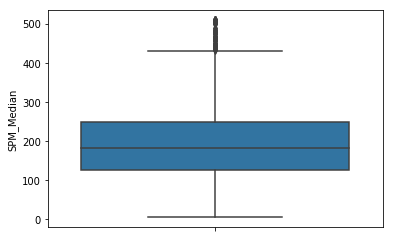

In [42]:
sns.boxplot(y="SPM_Median", data=YearClusterDataNSo2)

In [43]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
YearClusterDataNSo2_norm = standard_scaler.fit_transform(YearClusterDataNSo2)

In [44]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X[rand_X[j]].reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [45]:
hopkins(YearClusterDataNSo2_norm)

0.9155055038846958

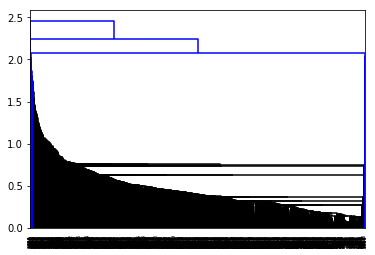

In [19]:
# heirarchical clustering
mergings = linkage(YearClusterDataNSo2_norm, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

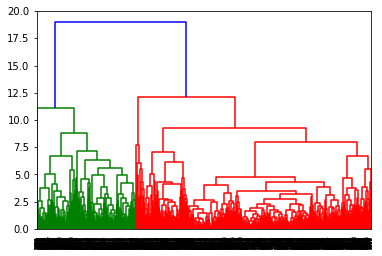

In [46]:
# heirarchical clustering
mergings = linkage(YearClusterDataNSo2_norm, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

#### seems like 2 clusters

In [47]:
YearClusterDataNSo2_ori.head()

,rec_id,SPM_P10,SPM_Median,SPM_P90,Median_SPM_MOM_diff,P10_SPM_MOM_diff,P90_SPM_MOM_diff
310,310,48.7,83.5,118.3,-119.5,-67.1,-159.1
311,311,51.4,113.0,204.2,29.5,2.7,85.9
312,312,119.4,246.5,300.0,133.5,68.0,95.8
313,313,106.1,203.0,259.9,-43.5,-13.3,-40.1
314,314,72.5,133.5,212.0,-69.5,-33.6,-47.9


### k-menas elbow and skilhoute recommedned 4

In [59]:
YearClusterDataNSo2_ori.reset_index(drop=True, inplace=True)
clusterCut.reset_index(drop=True, inplace=True)

In [95]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
YearClusterDataNSo2_OriClus = pd.concat([YearClusterDataNSo2_ori, clusterCut], axis=1)

In [96]:
clusterCut.shape

(2862,)

In [97]:
YearClusterDataNSo2_ori.shape

(2862, 7)

In [98]:
YearClusterDataNSo2_OriClus.columns

Index([             'rec_id',             'SPM_P10',          'SPM_Median',
                   'SPM_P90', 'Median_SPM_MOM_diff',    'P10_SPM_MOM_diff',
          'P90_SPM_MOM_diff',                     0],
      dtype='object')

In [99]:
YearClusterDataNSo2_OriClus.columns=['rec_id',             'SPM_P10',          'SPM_Median',
                   'SPM_P90', 'Median_SPM_MOM_diff',    'P10_SPM_MOM_diff',
          'P90_SPM_MOM_diff',    'ClusterId']

In [100]:
YearClusterDataNSo2_OriClus.shape

(2862, 8)

In [101]:
YearClusterDataNSo2_OriClus.head()

,rec_id,SPM_P10,SPM_Median,SPM_P90,Median_SPM_MOM_diff,P10_SPM_MOM_diff,P90_SPM_MOM_diff,ClusterId
0,310,48.7,83.5,118.3,-119.5,-67.1,-159.1,0
1,311,51.4,113.0,204.2,29.5,2.7,85.9,1
2,312,119.4,246.5,300.0,133.5,68.0,95.8,1
3,313,106.1,203.0,259.9,-43.5,-13.3,-40.1,1
4,314,72.5,133.5,212.0,-69.5,-33.6,-47.9,0


In [102]:
clusters_SPM_Median = 	pd.DataFrame(YearClusterDataNSo2_OriClus.groupby(["ClusterId"]).SPM_Median.mean())
clusters_SPM_P10 = 	pd.DataFrame(YearClusterDataNSo2_OriClus.groupby(["ClusterId"]).SPM_P10.mean())
clusters_SPM_P90 = 	pd.DataFrame(YearClusterDataNSo2_OriClus.groupby(["ClusterId"]).SPM_P90.mean())
clusters_Median_SPM_MOM_diff = 	pd.DataFrame(YearClusterDataNSo2_OriClus.groupby(["ClusterId"]).Median_SPM_MOM_diff.mean())
clusters_P10_SPM_MOM_diff = 	pd.DataFrame(YearClusterDataNSo2_OriClus.groupby(["ClusterId"]).P10_SPM_MOM_diff.mean())
clusters_P90_SPM_MOM_diff = 	pd.DataFrame(YearClusterDataNSo2_OriClus.groupby(["ClusterId"]).P90_SPM_MOM_diff.mean())

In [105]:
df = pd.concat([pd.Series([0,1,2,3]), clusters_SPM_P10,clusters_P10_SPM_MOM_diff,clusters_SPM_Median,clusters_Median_SPM_MOM_diff,  clusters_SPM_P90,clusters_P90_SPM_MOM_diff], axis=1)
df.columns = ["ClusterID", "clusters_SPM_P10", "clusters_P10_SPM_MOM_diff", "clusters_SPM_Median","clusters_Median_SPM_MOM_diff","clusters_SPM_P90","clusters_P90_SPM_MOM_diff"]
df.head()

,ClusterID,clusters_SPM_P10,clusters_P10_SPM_MOM_diff,clusters_SPM_Median,clusters_Median_SPM_MOM_diff,clusters_SPM_P90,clusters_P90_SPM_MOM_diff
0,0,171.092756,-38.432965,207.774517,-49.244653,255.948076,-51.065487
1,1,143.065181,12.066009,182.792853,16.442040,233.504887,18.694293
2,2,295.052778,132.764167,360.395833,155.680556,396.423611,127.342500
3,3,131.142857,-253.285714,131.142857,-253.285714,131.142857,-253.285714


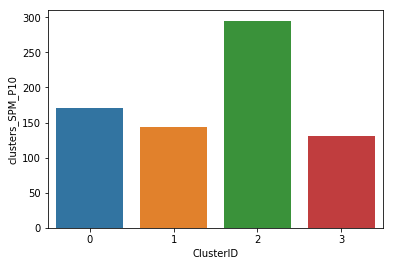

In [106]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.clusters_SPM_P10)

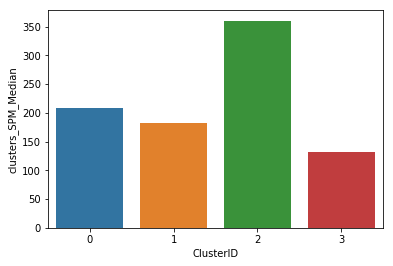

In [107]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.clusters_SPM_Median)

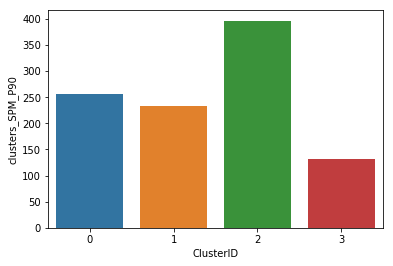

In [108]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.clusters_SPM_P90)

In [109]:
df.columns

Index(['ClusterID', 'clusters_SPM_P10', 'clusters_P10_SPM_MOM_diff',
       'clusters_SPM_Median', 'clusters_Median_SPM_MOM_diff',
       'clusters_SPM_P90', 'clusters_P90_SPM_MOM_diff'],
      dtype='object')

                      variables      values
0                     ClusterID    0.000000
1              clusters_SPM_P10  171.092756
2     clusters_P10_SPM_MOM_diff  -38.432965
3           clusters_SPM_Median  207.774517
4  clusters_Median_SPM_MOM_diff  -49.244653
5              clusters_SPM_P90  255.948076
6     clusters_P90_SPM_MOM_diff  -51.065487
                      variables      values
0                     ClusterID    1.000000
1              clusters_SPM_P10  143.065181
2     clusters_P10_SPM_MOM_diff   12.066009
3           clusters_SPM_Median  182.792853
4  clusters_Median_SPM_MOM_diff   16.442040
5              clusters_SPM_P90  233.504887
6     clusters_P90_SPM_MOM_diff   18.694293
                      variables      values
0                     ClusterID    2.000000
1              clusters_SPM_P10  295.052778
2     clusters_P10_SPM_MOM_diff  132.764167
3           clusters_SPM_Median  360.395833
4  clusters_Median_SPM_MOM_diff  155.680556
5              clusters_SPM_P90 

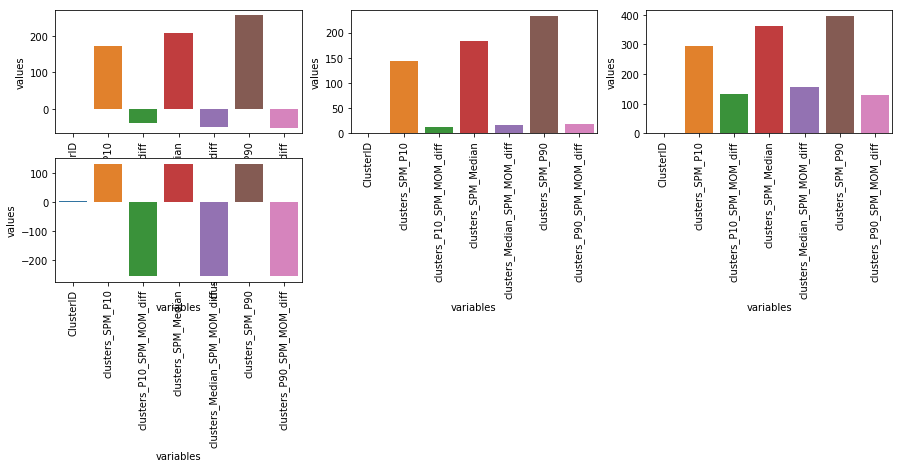

In [110]:
plt.figure(figsize = (15,5))
for i in range(0, 4):    
    ClusterOne=np.transpose(df[df.ClusterID==i])
    ClusterOne.reset_index(inplace=True)
    ClusterOne.columns=['variables', 'values']
    ClusterOne['values']=ClusterOne['values'].map(float)
    print(ClusterOne)
    plt.subplot(2, 3, i+1)
    t=sns.barplot(x='variables',y='values',data=ClusterOne)
    t.set_xticklabels(labels=ClusterOne.variables,rotation=90)

In [111]:
YearClusterDataNSo2_OriClus.columns

Index(['rec_id', 'SPM_P10', 'SPM_Median', 'SPM_P90', 'Median_SPM_MOM_diff',
       'P10_SPM_MOM_diff', 'P90_SPM_MOM_diff', 'ClusterId'],
      dtype='object')

In [112]:
woyCluster=YearClusterDataNSo2_OriClus[['rec_id','ClusterId']]

In [113]:
Base_polpop_iell_csrf_ClusWoYear=Base_polpop_iell_csrf.merge(woyCluster,how='left', suffixes=('_data', '_cluster'),left_on=['rec_id'], right_on=['rec_id'])

In [114]:
Base_polpop_iell_csrf_ClusWoYear.columns

Index(['Unnamed: 0', 'City_poll', 'Type_of_Location', 'year_number',
       'month_number', 'NO2_Median', 'RSPM_PM10_Median', 'SO2_Median',
       'SPM_Median', 'Median_SO2_MOM_diff',
       ...
       'Main_District_Highway_per', 'Other_district_Rural_Roads_per',
       'indus_by_overall', 'indus_by_forest', 'indus_by_nonforest', 'rec_id',
       'RainPerArea', 'CarSalesPerArea', 'RainPerCarSales', 'ClusterId'],
      dtype='object', length=107)

In [115]:
Base_ClusWoYear=Base_polpop_iell_csrf_ClusWoYear[['City_poll','Type_of_Location', 'ClusterId','year_number','month_number']]

In [116]:
Base_ClusWoYear.head()

,City_poll,Type_of_Location,ClusterId,year_number,month_number
0,AKOLA,Industrial,NaN,2011,1.0
1,AKOLA,Industrial,NaN,2011,2.0
2,AKOLA,Industrial,NaN,2011,3.0
3,AKOLA,Industrial,NaN,2011,4.0
4,AKOLA,Industrial,NaN,2011,5.0


In [117]:
Base_ClusWoYear=Base_ClusWoYear.sort_values(by=['City_poll', 'year_number','month_number'])

In [118]:
Base_ClusWoYear.shape

(5715, 5)

In [119]:
Base_ClusWoYear.head()

,City_poll,Type_of_Location,ClusterId,year_number,month_number
0,AKOLA,Industrial,NaN,2011,1.0
12,AKOLA,Residential,NaN,2011,1.0
1,AKOLA,Industrial,NaN,2011,2.0
13,AKOLA,Residential,NaN,2011,2.0
2,AKOLA,Industrial,NaN,2011,3.0


In [121]:
Base_ClusWoYear.to_csv(path_or_buf ='C:\MS\EDA\Base_spm5_24oct.csv')

---- kmeans

In [89]:
# Kmeans with K=4
model_clus5 = KMeans(n_clusters = 4, max_iter=50)
model_clus5.fit(YearClusterDataNSo2_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.m

In [90]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(YearClusterDataNSo2_norm)
    sse_.append([k, silhouette_score(YearClusterDataNSo2_norm, kmeans.labels_)])

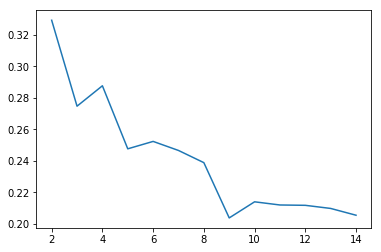

In [91]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

### 4 seems to get a spike

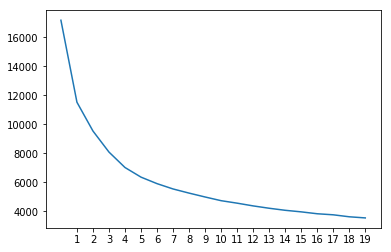

In [94]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(YearClusterDataNSo2_norm)
    ssd.append(model_clus.inertia_)
plt.xticks(np.arange(1, 21, 1.0))
plt.plot(ssd)


#### 5 is at a lower end may be four truely is better